<a href="https://colab.research.google.com/github/Senbonsakurakageyoshi1/AgrifieldNet/blob/main/New_agrifield_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import matplotlib as plt

In [97]:
df=pd.read_csv('./agrifield_data.csv')

## Data transformation pipeline 

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),
])


In [99]:
df.head()

,Unnamed: 0,field_id,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B11,B12,crop_id
0,0,1,45.000000,42.444444,42.722222,48.000000,49.666667,58.000000,65.222222,60.277778,71.944444,12.000000,80.277778,61.333333,1
1,1,2,45.000000,42.000000,42.166667,47.666667,49.250000,59.916667,69.000000,63.916667,76.333333,12.833333,79.916667,56.750000,1
2,2,3,45.000000,42.687500,43.500000,49.187500,51.437500,62.875000,71.625000,66.625000,79.312500,13.000000,82.125000,58.062500,1
3,3,4,45.866667,42.466667,43.800000,47.733333,49.466667,59.733333,68.133333,62.600000,73.466667,11.266667,77.600000,55.000000,2
4,4,5,46.000000,43.238095,45.238095,49.285714,50.904762,60.904762,68.952381,63.380952,74.547619,11.333333,77.452381,55.809524,2


In [100]:
df=df.drop('Unnamed: 0',axis=1)

In [101]:
df.head()

,field_id,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B11,B12,crop_id
0,1,45.000000,42.444444,42.722222,48.000000,49.666667,58.000000,65.222222,60.277778,71.944444,12.000000,80.277778,61.333333,1
1,2,45.000000,42.000000,42.166667,47.666667,49.250000,59.916667,69.000000,63.916667,76.333333,12.833333,79.916667,56.750000,1
2,3,45.000000,42.687500,43.500000,49.187500,51.437500,62.875000,71.625000,66.625000,79.312500,13.000000,82.125000,58.062500,1
3,4,45.866667,42.466667,43.800000,47.733333,49.466667,59.733333,68.133333,62.600000,73.466667,11.266667,77.600000,55.000000,2
4,5,46.000000,43.238095,45.238095,49.285714,50.904762,60.904762,68.952381,63.380952,74.547619,11.333333,77.452381,55.809524,2


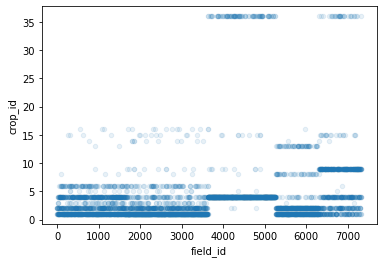

In [102]:
df.plot(kind="scatter",x="field_id",y="crop_id",alpha=0.1)

In [103]:
df.describe()

,field_id,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B11,B12,crop_id
count,5551.000000,5551.000000,5551.000000,5551.000000,5551.000000,5551.000000,5551.000000,5551.000000,5551.000000,5551.000000,5551.000000,5551.000000,5551.000000,5551.000000
mean,3599.817510,43.551038,39.197783,38.338501,40.963663,44.133547,56.244932,64.907333,61.641481,71.667237,13.611396,73.426054,51.829617,3.868852
std,2085.580756,2.878113,3.486734,4.671453,7.863293,7.088226,5.714856,6.671115,6.284680,7.653518,2.486175,15.690605,13.851583,5.640180
min,1.000000,29.846995,23.814208,21.147541,19.743169,26.000000,31.285714,34.857143,33.035714,36.428571,7.000000,16.115385,8.846154,1.000000
25%,1808.000000,42.306250,37.250000,35.066964,35.444444,39.800000,52.500000,60.965476,58.250000,67.400000,12.000000,67.961751,46.476673,1.000000
50%,3547.000000,44.000000,39.868421,38.634146,41.500000,44.800000,56.440000,65.225806,62.238095,72.210811,13.000000,76.590909,55.000000,2.000000
75%,5422.500000,45.217029,41.530012,41.685185,46.777530,49.035964,60.181818,69.411765,65.785714,76.875000,15.000000,83.694838,61.041022,4.000000
max,7332.000000,50.000000,49.068966,54.085366,72.382353,73.264706,82.023810,96.416667,90.880952,102.857143,27.431373,108.534247,84.588235,36.000000


In [104]:
df['crop_id'].describe()

count    5551.000000
mean        3.868852
std         5.640180
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        36.000000
Name: crop_id, dtype: float64

In [105]:
df['crop_id'].value_counts()

1     2031
4     1641
2      990
9      293
6      163
36     129
3      103
13      59
8       48
15      41
5       23
16      16
14      14
Name: crop_id, dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5551 entries, 0 to 5550
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   field_id  5551 non-null   int64  
 1   B01       5551 non-null   float64
 2   B02       5551 non-null   float64
 3   B03       5551 non-null   float64
 4   B04       5551 non-null   float64
 5   B05       5551 non-null   float64
 6   B06       5551 non-null   float64
 7   B07       5551 non-null   float64
 8   B08       5551 non-null   float64
 9   B8A       5551 non-null   float64
 10  B09       5551 non-null   float64
 11  B11       5551 non-null   float64
 12  B12       5551 non-null   float64
 13  crop_id   5551 non-null   int64  
dtypes: float64(12), int64(2)
memory usage: 607.3 KB


# Testing differents plots

## histogram

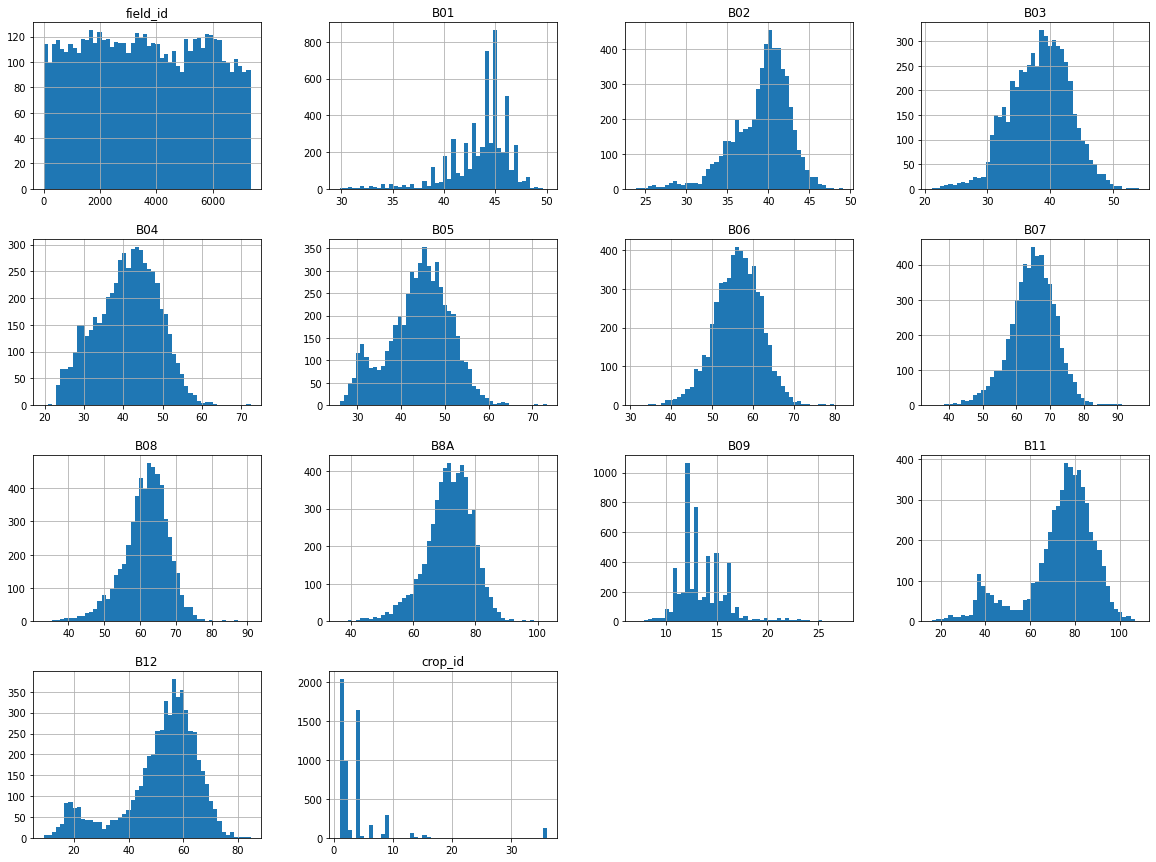

In [107]:
%matplotlib inline 
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

## scatter plot

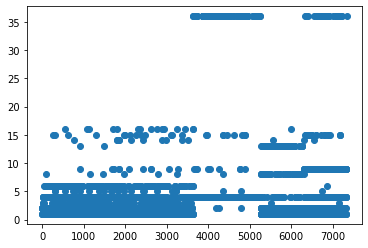

In [108]:
%matplotlib inline 


plt.scatter(df["field_id"],df["crop_id"])
plt.show()

## boxplot

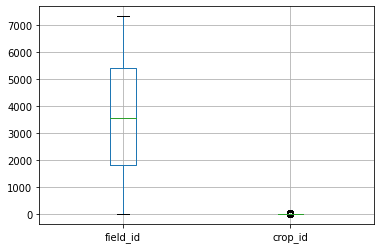

In [109]:
df[['field_id','crop_id']].boxplot()

##**Looking for correlations**

In [110]:
df.cov()

,field_id,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B11,B12,crop_id
field_id,4.349647e+06,-1122.514134,-2560.522107,-4364.310091,-6327.244907,-6521.829772,-6146.749931,-5285.070623,-4444.216666,-6156.528462,-210.637649,-15147.059403,-12612.116691,2744.933900
B01,-1.122514e+03,8.283535,8.780277,8.597452,7.611098,5.252864,5.705540,6.677203,4.111811,5.201287,-2.640394,-3.160916,0.569193,-2.821836
B02,-2.560522e+03,8.780277,12.157313,14.984243,19.701817,15.852557,11.237523,10.597306,7.643986,9.620687,-2.061024,13.701173,17.331429,-5.510134
B03,-4.364310e+03,8.597452,14.984243,21.822471,33.351807,28.548426,18.797037,16.386343,13.102607,16.451391,-1.134526,36.978161,39.014783,-8.230836
B04,-6.327245e+03,7.611098,19.701817,33.351807,61.831377,54.533374,28.388695,20.655706,18.711507,23.240764,2.502973,88.212617,88.522425,-14.169924
B05,-6.521830e+03,5.252864,15.852557,28.548426,54.533374,50.242943,28.606826,21.757787,20.878504,25.612514,4.113392,89.284780,85.405709,-12.239689
B06,-6.146750e+03,5.705540,11.237523,18.797037,28.388695,28.606826,32.659577,35.777492,33.141067,40.355440,2.225598,54.767310,43.365967,-5.376732
B07,-5.285071e+03,6.677203,10.597306,16.386343,20.655706,21.757787,35.777492,44.503771,40.866840,49.930547,0.805876,44.004629,28.715965,-2.472125
B08,-4.444217e+03,4.111811,7.643986,13.102607,18.711507,20.878504,33.141067,40.866840,39.497201,47.501446,2.813281,50.014681,33.123640,-2.017352
B8A,-6.156528e+03,5.201287,9.620687,16.451391,23.240764,25.612514,40.355440,49.930547,47.501446,58.576342,1.878569,63.901613,41.843503,-2.755494


In [111]:
df.corr()

,field_id,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B11,B12,crop_id
field_id,1.000000,-0.187007,-0.352114,-0.447957,-0.385819,-0.441169,-0.515719,-0.379862,-0.339067,-0.385698,-0.040623,-0.462873,-0.436578,0.233352
B01,-0.187007,1.000000,0.874947,0.639455,0.336306,0.257484,0.346883,0.347767,0.227322,0.236125,-0.369002,-0.069995,0.014278,-0.173832
B02,-0.352114,0.874947,1.000000,0.919950,0.718593,0.641421,0.563958,0.455594,0.348833,0.360517,-0.237757,0.250437,0.358853,-0.280189
B03,-0.447957,0.639455,0.919950,1.000000,0.907952,0.862170,0.704096,0.525813,0.446296,0.460140,-0.097686,0.504491,0.602945,-0.312391
B04,-0.385819,0.336306,0.718593,0.907952,1.000000,0.978409,0.631736,0.393765,0.378635,0.386176,0.128032,0.714968,0.812736,-0.319499
B05,-0.441169,0.257484,0.641421,0.862170,0.978409,1.000000,0.706199,0.460128,0.468682,0.472121,0.233416,0.802787,0.869861,-0.306154
B06,-0.515719,0.346883,0.563958,0.704096,0.631736,0.706199,1.000000,0.938439,0.922737,0.922647,0.156643,0.610768,0.547828,-0.166809
B07,-0.379862,0.347767,0.455594,0.525813,0.393765,0.460128,0.938439,1.000000,0.974742,0.977928,0.048589,0.420398,0.310760,-0.065702
B08,-0.339067,0.227322,0.348833,0.446296,0.378635,0.468682,0.922737,0.974742,1.000000,0.987558,0.180052,0.507195,0.380501,-0.056912
B8A,-0.385698,0.236125,0.360517,0.460140,0.386176,0.472121,0.922647,0.977928,0.987558,1.000000,0.098727,0.532122,0.394700,-0.063833


In [112]:
df1 = df.drop(["field_id","crop_id"],axis=1)

df1.cov()

,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B11,B12
B01,8.283535,8.780277,8.597452,7.611098,5.252864,5.705540,6.677203,4.111811,5.201287,-2.640394,-3.160916,0.569193
B02,8.780277,12.157313,14.984243,19.701817,15.852557,11.237523,10.597306,7.643986,9.620687,-2.061024,13.701173,17.331429
B03,8.597452,14.984243,21.822471,33.351807,28.548426,18.797037,16.386343,13.102607,16.451391,-1.134526,36.978161,39.014783
B04,7.611098,19.701817,33.351807,61.831377,54.533374,28.388695,20.655706,18.711507,23.240764,2.502973,88.212617,88.522425
B05,5.252864,15.852557,28.548426,54.533374,50.242943,28.606826,21.757787,20.878504,25.612514,4.113392,89.284780,85.405709
B06,5.705540,11.237523,18.797037,28.388695,28.606826,32.659577,35.777492,33.141067,40.355440,2.225598,54.767310,43.365967
B07,6.677203,10.597306,16.386343,20.655706,21.757787,35.777492,44.503771,40.866840,49.930547,0.805876,44.004629,28.715965
B08,4.111811,7.643986,13.102607,18.711507,20.878504,33.141067,40.866840,39.497201,47.501446,2.813281,50.014681,33.123640
B8A,5.201287,9.620687,16.451391,23.240764,25.612514,40.355440,49.930547,47.501446,58.576342,1.878569,63.901613,41.843503
B09,-2.640394,-2.061024,-1.134526,2.502973,4.113392,2.225598,0.805876,2.813281,1.878569,6.181066,12.210059,11.141362


In [113]:
df1.corr()

,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B11,B12
B01,1.000000,0.874947,0.639455,0.336306,0.257484,0.346883,0.347767,0.227322,0.236125,-0.369002,-0.069995,0.014278
B02,0.874947,1.000000,0.919950,0.718593,0.641421,0.563958,0.455594,0.348833,0.360517,-0.237757,0.250437,0.358853
B03,0.639455,0.919950,1.000000,0.907952,0.862170,0.704096,0.525813,0.446296,0.460140,-0.097686,0.504491,0.602945
B04,0.336306,0.718593,0.907952,1.000000,0.978409,0.631736,0.393765,0.378635,0.386176,0.128032,0.714968,0.812736
B05,0.257484,0.641421,0.862170,0.978409,1.000000,0.706199,0.460128,0.468682,0.472121,0.233416,0.802787,0.869861
B06,0.346883,0.563958,0.704096,0.631736,0.706199,1.000000,0.938439,0.922737,0.922647,0.156643,0.610768,0.547828
B07,0.347767,0.455594,0.525813,0.393765,0.460128,0.938439,1.000000,0.974742,0.977928,0.048589,0.420398,0.310760
B08,0.227322,0.348833,0.446296,0.378635,0.468682,0.922737,0.974742,1.000000,0.987558,0.180052,0.507195,0.380501
B8A,0.236125,0.360517,0.460140,0.386176,0.472121,0.922647,0.977928,0.987558,1.000000,0.098727,0.532122,0.394700
B09,-0.369002,-0.237757,-0.097686,0.128032,0.233416,0.156643,0.048589,0.180052,0.098727,1.000000,0.313001,0.323525


In [114]:

def is_more_correlated(corrdf,alpha):
        list_of_columns = corrdf.columns
        
        for columns in list_of_columns :
            
    
            e = [i for (z,i) in zip(corrdf[columns].values,list_of_columns) if z>alpha]
        
            print(f"{columns} is more correlated with {e}")

corrdf = df1.corr()
alpha = 0.44
is_more_correlated(corrdf,alpha)


B01 is more correlated with ['B01', 'B02', 'B03']
B02 is more correlated with ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07']
B03 is more correlated with ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B11', 'B12']
B04 is more correlated with ['B02', 'B03', 'B04', 'B05', 'B06', 'B11', 'B12']
B05 is more correlated with ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B11', 'B12']
B06 is more correlated with ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B11', 'B12']
B07 is more correlated with ['B02', 'B03', 'B05', 'B06', 'B07', 'B08', 'B8A']
B08 is more correlated with ['B03', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B11']
B8A is more correlated with ['B03', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B11']
B09 is more correlated with ['B09']
B11 is more correlated with ['B03', 'B04', 'B05', 'B06', 'B08', 'B8A', 'B11', 'B12']
B12 is more correlated with ['B03', 'B04', 'B05', 'B06', 'B11', 'B12']


In [115]:
# i suggest that we drop  B09

## Here firstly we have to define correlation coefficient 

In [116]:
# 1- i think that if we want to go on with traditional machine learning algorithm  we have to combine channel values surely using PCA

#Defining differents traditionnals machine learning models

##Differents imports

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#Splitting Data into train_test

In [118]:
# split data for model training and evaluation 

X_train, X_test, y_train, y_test =  train_test_split(df.drop(['field_id', 'crop_id'], axis=1), df['crop_id'] , test_size=0.25, random_state=42)

In [119]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4163, 12), (1388, 12), (4163,), (1388,))

##K-Nearest Neighbors


###Training

In [120]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train.astype(int))

KNeighborsClassifier(n_neighbors=7)

###Testing

In [121]:

y_pred_crop_knn = knn.predict(X_test)

print(classification_report(y_test,y_pred_crop_knn))

              precision    recall  f1-score   support

           1       0.61      0.81      0.70       516
           2       0.40      0.34      0.37       235
           3       0.00      0.00      0.00        27
           4       0.81      0.72      0.76       422
           5       0.00      0.00      0.00         4
           6       0.18      0.07      0.10        44
           8       0.00      0.00      0.00        15
           9       0.65      0.85      0.74        78
          13       0.25      0.13      0.17        15
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         3
          36       0.25      0.05      0.08        20

    accuracy                           0.63      1388
   macro avg       0.24      0.23      0.22      1388
weighted avg       0.59      0.63      0.60      1388



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
y_pred_proba_knn = knn.predict_proba(X_test)

###Cross Entropy

In [123]:
cross_loss_knn = log_loss(y_test,y_pred_proba_knn)
print(cross_loss_knn)

4.575014718123374


##Support vector machine

###Training

In [124]:
svm_model_linear = SVC(kernel = 'linear', C = 1,probability=True)
svm_model_linear.fit(X_train, y_train.astype(int))

SVC(C=1, kernel='linear', probability=True)

###testing

In [125]:

y_pred_crop = svm_model_linear.predict(X_test)

print(classification_report(y_test,y_pred_crop))

              precision    recall  f1-score   support

           1       0.57      0.92      0.71       516
           2       0.41      0.05      0.09       235
           3       0.00      0.00      0.00        27
           4       0.74      0.75      0.74       422
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00        44
           8       0.00      0.00      0.00        15
           9       0.68      0.86      0.76        78
          13       0.00      0.00      0.00        15
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         3
          36       0.00      0.00      0.00        20

    accuracy                           0.63      1388
   macro avg       0.19      0.20      0.18      1388
weighted avg       0.55      0.63      0.55      1388



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
y_pred_proba_svm = svm_model_linear.predict_proba(X_test)

###Cross entropy loss

In [127]:
cross_loss_svm = log_loss(y_test,y_pred_proba_svm)
print(cross_loss_svm)

1.0835088316907435


##Random Forest

###Training

In [128]:
# We ran a simple hyperparameter tuning for the number of trees, and concluded to use:
n_trees = 300

# Fitting the RF model
rf = RandomForestClassifier(n_estimators = n_trees,   oob_score = True, n_jobs = -1,random_state =50,max_features = "auto", min_samples_leaf = 10)
rf.fit(X_train, y_train.astype(int))

# trained classes

rf.classes_

array([ 1,  2,  3,  4,  5,  6,  8,  9, 13, 14, 15, 16, 36])

###testing

In [129]:

y_pred_crop1 = rf.predict(X_test)

print(classification_report(y_test,y_pred_crop1))

              precision    recall  f1-score   support

           1       0.62      0.88      0.73       516
           2       0.45      0.30      0.36       235
           3       0.00      0.00      0.00        27
           4       0.78      0.74      0.76       422
           5       0.00      0.00      0.00         4
           6       0.33      0.07      0.11        44
           8       0.00      0.00      0.00        15
           9       0.72      0.88      0.79        78
          13       0.00      0.00      0.00        15
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         3
          36       0.00      0.00      0.00        20

    accuracy                           0.66      1388
   macro avg       0.22      0.22      0.21      1388
weighted avg       0.60      0.66      0.61      1388



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
y_pred_proba_rf = rf.predict_proba(X_test)

###Cross entropy loss

In [131]:
cross_loss = log_loss(y_test,y_pred_proba_rf)
print(cross_loss)

1.053847102283575


##OneVsRest Algorithm

###Training

###Testing

###Cross entropy loss

##XGBOOST

###Training

In [132]:
Onerest = OneVsRestClassifier(XGBClassifier(n_jobs=-1, max_depth=2))

In [133]:
# You may need to use MultiLabelBinarizer to encode your variables from arrays [[x, y, z]] to a multilabel 
# format before training.
mlb = MultiLabelBinarizer()
#

Onerest.fit(X_train, y_train.astype(int))



OneVsRestClassifier(estimator=XGBClassifier(max_depth=2, n_jobs=-1))

###Testing

In [134]:
y_pred_crop_onerest = Onerest.predict(X_test)
print(classification_report(y_test,y_pred_crop_onerest))

              precision    recall  f1-score   support

           1       0.57      0.91      0.70       516
           2       0.41      0.18      0.25       235
           3       0.00      0.00      0.00        27
           4       0.86      0.72      0.78       422
           5       0.00      0.00      0.00         4
           6       0.31      0.09      0.14        44
           8       0.00      0.00      0.00        15
           9       0.71      0.92      0.80        78
          13       0.00      0.00      0.00        15
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         3
          36       0.33      0.05      0.09        20

    accuracy                           0.64      1388
   macro avg       0.25      0.22      0.21      1388
weighted avg       0.60      0.64      0.59      1388



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [135]:
y_pred_proba_xgb = Onerest.predict_proba(X_test)

###Cross entropy

In [136]:
cross_loss_xgb = log_loss(y_test,y_pred_proba_xgb)
print(cross_loss_xgb)

1.0470755177117905


##Naives Bayes

###Training

In [137]:

gnb = GaussianNB()
gnb.fit(X_train, y_train.astype(int))

GaussianNB()

###Testing

In [138]:
from sklearn.metrics import classification_report
y_pred_crop_NB = gnb.predict(X_test)

print(classification_report(y_test,y_pred_crop_NB))

              precision    recall  f1-score   support

           1       0.57      0.63      0.60       516
           2       0.08      0.00      0.01       235
           3       0.08      0.26      0.13        27
           4       0.86      0.48      0.62       422
           5       0.00      0.00      0.00         4
           6       0.12      0.55      0.20        44
           8       0.10      0.47      0.17        15
           9       0.48      0.97      0.64        78
          13       0.25      0.07      0.11        15
          14       0.00      0.00      0.00         2
          15       0.04      0.14      0.06         7
          16       0.00      0.00      0.00         3
          36       0.05      0.10      0.07        20

    accuracy                           0.47      1388
   macro avg       0.20      0.28      0.20      1388
weighted avg       0.53      0.47      0.46      1388



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:
y_pred_proba_NB = Onerest.predict_proba(X_test)

###Cross entropy

In [140]:
cross_loss_NB = log_loss(y_test,y_pred_proba_NB)
print(cross_loss_NB)

1.0470755177117905


#Cross validation

##function to show cross entropy result

In [141]:
def show_cross():

  #Random Forest
  cross_loss = log_loss(y_test,y_pred_proba_rf)
  print('The random forest has a cross lost of :',cross_loss)

  #support vector machine
  cross_loss_svm = log_loss(y_test,y_pred_proba_svm)
  print('The support vector machine has a cross lost of :',cross_loss_svm)

  #K-nearest Neighbors
  cross_loss_knn = log_loss(y_test,y_pred_proba_knn)
  print('The k nearest neighborhs has a cross lost of ',cross_loss_knn)

  #x gboost
  cross_loss_xgb = log_loss(y_test,y_pred_proba_xgb)
  print('The Xgboost model has a cross lost of ',cross_loss_xgb)

  #Naives Bayes
  cross_loss_NB = log_loss(y_test,y_pred_proba_NB)
  print('The Naives Bayes has a cross lost of ',cross_loss_NB)


show_cross()


The random forest has a cross lost of : 1.053847102283575
The support vector machine has a cross lost of : 1.0835088316907435
The k nearest neighborhs has a cross lost of  4.575014718123374
The Xgboost model has a cross lost of  1.0470755177117905
The Naives Bayes has a cross lost of  1.0470755177117905


##Random forest

In [149]:
scores = cross_val_score(rf, X_train, y_train,scoring="neg_log_loss", cv=10)
print(-scores)
classes = rf.classes_

def display_scores(scores):

  print("Scores:", scores)
  
  print("Mean:", scores.mean())
  
  print("Standard deviation:", scores.std())

display_scores(scores)



[1.09975961 1.11983914 1.02374394 1.12272962 1.0994881  1.15501891
 1.04672261 1.19150153 1.08890665 1.01302916]
Scores: [-1.09975961 -1.11983914 -1.02374394 -1.12272962 -1.0994881  -1.15501891
 -1.04672261 -1.19150153 -1.08890665 -1.01302916]
Mean: -1.096073927291202
Standard deviation: 0.05338208628112859


#Fine Tuning our models

##Grisearch

In [ ]:

param_grid = [
{'n_estimators': [100, 125, 150,175,200,225,250,275,300,325,350,375,400],  'oob_score' : [True,False],'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features':['auto'],'random_state ':[10,20,30,50,60,70,80,90,100]},
]

grid_search = GridSearchCV(rf, param_grid, cv=10,scoring='neg_log_loss',return_train_score=True)
grid_search.fit(X_train, y_train)